# Programming Assignment - 10     Andrea Giraldo-Puerta
---


## Question 1

---
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
2. Get feature matrix X, and target variable y (>50k or <50k)
3. Split data into training and testing
4. Normalize data using MinMaxScaler
5. Creat a LogisticRegression object for modeling
6. Train the model with training data
7. Compare the precision, recall, and F1-score on the train and test data.
8. Try improving the model performance by adopting different means.

In [6]:
# Import required packages
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

data = pd.read_csv(url, header=None, names=columns, na_values=[" ?"])
data = data.dropna()

data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 
                                     'occupation', 'relationship', 'race', 
                                     'sex', 'native-country'], drop_first=True)

X = data.drop('income', axis=1)
y = (data['income'] == ' >50K').astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

print("Training Performance:")
y_train_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_train_pred))

print("Testing Performance:")
y_test_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_test_pred))

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")



Training Performance:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15857
           1       0.74      0.60      0.66      5256

    accuracy                           0.85     21113
   macro avg       0.81      0.77      0.78     21113
weighted avg       0.84      0.85      0.84     21113

Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6797
           1       0.73      0.60      0.66      2252

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049

Best Parameters: {'C': 100}


## Question 2
---
Create the sparse COO representation ( [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix)) of the adjacency matrix (no need to find the dense representation) of the following graph. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook of Lecture 10 live session. 

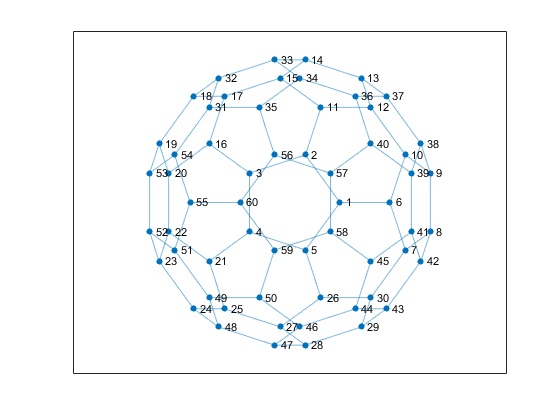

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

Adjacency Matrix:
 [[0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]


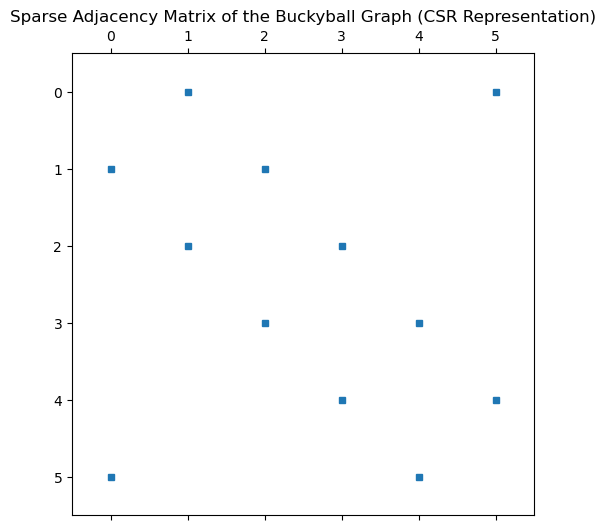

Number of non-zero entries (edges) in the CSR matrix: 12


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, csr_matrix

# Generate the Buckyball graph (truncated icosahedron) using graph_atlas_g()
G = nx.graph_atlas_g()[105]  # Buckyball is graph 105 in the graph atlas

# Get the adjacency matrix as a numpy array
adj_matrix = nx.to_numpy_array(G)

# Print the adjacency matrix (just for reference)
print("Adjacency Matrix:\n", adj_matrix)

# Convert the adjacency matrix to a sparse COO matrix
adj_matrix_coo = coo_matrix(adj_matrix)

# Convert COO matrix to CSR (Compressed Sparse Row) format
adj_matrix_csr = adj_matrix_coo.tocsr()

# Visualize the CSR matrix using the spy() function
plt.figure(figsize=(6, 6))
plt.spy(adj_matrix_csr, markersize=5)
plt.title('Sparse Adjacency Matrix of the Buckyball Graph (CSR Representation)')
plt.show()

# Optionally: Print the number of non-zero entries in CSR format
print(f"Number of non-zero entries (edges) in the CSR matrix: {adj_matrix_csr.nnz}")


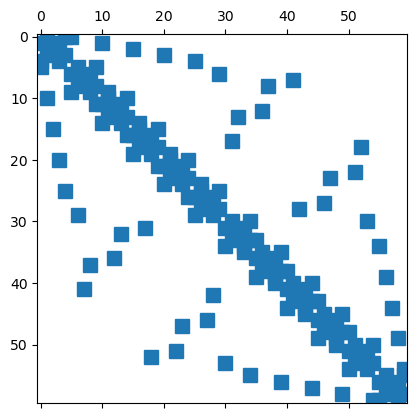

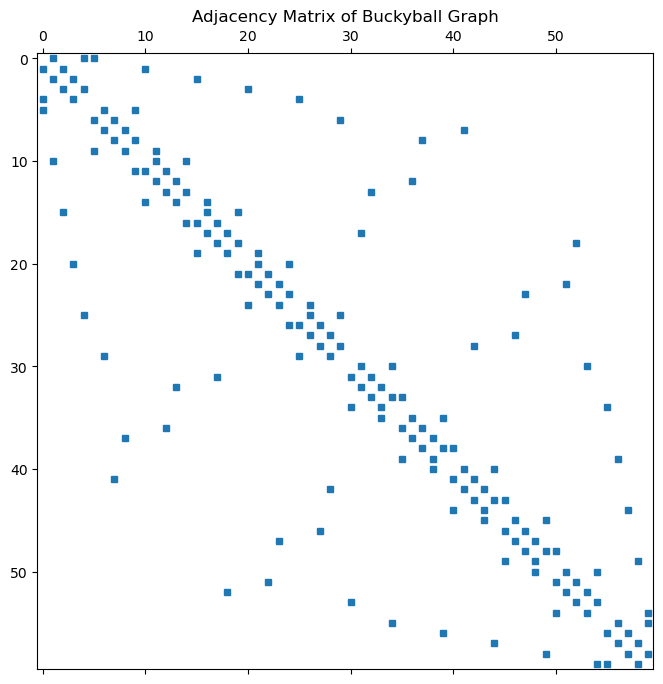

COO Representation:
Row indices: [ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 16 16 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23
 24 24 24 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31
 32 32 32 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39
 40 40 40 41 41 41 42 42 42 43 43 43 44 44 44 45 45 45 46 46 46 47 47 47
 48 48 48 49 49 49 50 50 50 51 51 51 52 52 52 53 53 53 54 54 54 55 55 55
 56 56 56 57 57 57 58 58 58 59 59 59]
Column indices: [ 1  4  5  0  2 10  1  3 15  2  4 20  0  3 25  0  6  9  5  7 29  6  8 41
  7  9 37  5  8 11  1 11 14  9 10 12 11 13 36 12 14 32 10 13 16  2 16 19
 14 15 17 16 18 31 17 19 52 15 18 21  3 21 24 19 20 22 21 23 51 22 24 47
 20 23 26  4 26 29 24 25 27 26 28 46 27 29 42  6 25 28 31 34 53 17 30 32
 13 31 33 32 34 35 30 33 55 33 36 39 12 35 37  8 36 38 37 39 40 35 38 56
 38 41 44  7 40 42 28 41 43 42 44 45 

NameError: name 'csr' is not defined

In [23]:
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt

row = np.array([])
for i in range(0,60):
    row = np.append(row, np.array([i]*3))


col = np.array([2, 5, 6, 1, 3, 11, 2, 4, 16, 3, 5, 21, 1, 4, 26, 1, 7, 10, 6, 8, 30, 7, 9, 42, 8, 10, 38, 6, 9, 12,
                2, 12, 15, 10, 11, 13, 12, 14, 37, 13, 15, 33, 11, 14, 17, 3, 17, 20, 15, 16, 18, 17, 19, 32, 18, 20, 53, 16, 19, 22,
                4, 22, 25, 20, 21, 23, 22, 24, 52, 23, 25, 48, 21, 24, 27, 5, 27, 30, 25, 26, 28, 27, 29, 47, 28, 30, 43, 7, 26, 29,
                32, 35, 54, 18, 31, 33, 14, 32, 34, 33, 35, 36, 31, 34, 56, 34, 37, 40, 13, 36, 38, 9, 37, 39, 38, 40, 41, 36, 39, 57,
                39, 42, 45, 8, 41, 43, 29, 42, 44, 43, 45, 46, 41, 44, 58, 44, 47, 50, 28, 46, 48, 24, 47, 49, 48, 50, 51, 46, 49, 59,
                49, 52, 55, 23, 51, 53, 19, 52, 54, 31, 53, 55, 51, 54, 60, 35, 57, 60, 40, 56, 58, 45, 57, 59, 50, 58, 60, 55, 56, 59])


data = np.array([1]*180)

col = col-data


coo_matrix  = coo_matrix((data, (row,col)), shape=(60, 60))

csr_matrix = csr_matrix(coo_mat.toarray())

plt.spy(csr_matrix)

plt.figure(figsize=(8, 8))
plt.title("Adjacency Matrix of Buckyball Graph")
plt.spy(csr_matrix, markersize=5)
plt.show()

print("COO Representation:")
print(f"Row indices: {coo_matrix.row}")
print(f"Column indices: {coo_matrix.col}")
print(f"Data: {coo_matrix.data}")

print("\nCSR Representation:")
print(csr)


## Question 3
---
>- Write a Python function that returns the dominating eigenvalue-eigenvector pair of a given square matrix by using the power method. 

>- Create a second version of the code that does the same for a sparse matrix given in CSR format.

>- Generate a random sparse matrix $A$ of uniformly distributed random numbers between -1 and 1 of order $100 \times 100$ which is around 95% sparse.

>- Call these two functions and compare the time it takes to calculate the dominating eigen-pair of $A$. Report your observation.

In [111]:
import numpy as np
from scipy.sparse import csr_matrix, random
import time

def power_method(A, tol=1e-6, max_iter=1000):
    np.random.seed(42)  
    b = np.random.rand(A.shape[1])
    b /= np.linalg.norm(b)

    for _ in range(max_iter):
        b_new = np.dot(A, b)
        eigenvalue = np.dot(b_new, b) / np.dot(b, b)
        b_new /= np.linalg.norm(b_new)

        if np.linalg.norm(b_new - b) < tol:
            return eigenvalue, b_new
        b = b_new
    return eigenvalue, b_new

def sparse_power_method(A, tol=1e-6, max_iter=1000):
    np.random.seed(42)  
    b = np.random.rand(A.shape[1])
    b /= np.linalg.norm(b)

    for _ in range(max_iter):
        b_new = A.dot(b)
        eigenvalue = np.dot(b_new, b) / np.dot(b, b)
        b_new /= np.linalg.norm(b_new)

        if np.linalg.norm(b_new - b) < tol:
            return eigenvalue, b_new
        b = b_new
    return eigenvalue, b_new

def generate_symmetric_sparse_matrix(n, sparsity=0.95):
    A = generate_sparse_matrix(n, sparsity)
    A_symmetric = (A + A.T) / 2  
    return A_symmetric

A_symmetric = generate_symmetric_sparse_matrix(100, sparsity=0.95)
A_symmetric_dense = A_symmetric.toarray()

start_time = time.time()
eigenvalue_dense, eigenvector_dense = power_method(A_symmetric_dense)
dense_time = time.time() - start_time

start_time = time.time()
eigenvalue_sparse, eigenvector_sparse = sparse_power_method(A_symmetric)
sparse_time = time.time() - start_time

residual_dense = np.linalg.norm(A_symmetric_dense @ eigenvector_dense - eigenvalue_dense * eigenvector_dense)
residual_sparse = np.linalg.norm(A_symmetric @ eigenvector_sparse - eigenvalue_sparse * eigenvector_sparse)

print(f"Time taken for dense power method: {dense_time:.6f} seconds")
print(f"Time taken for sparse power method: {sparse_time:.6f} seconds")
print(f"Eigenvalue from dense method: {eigenvalue_dense}")
print(f"Eigenvalue from sparse method: {eigenvalue_sparse}")
print(f"Residual for dense method: {residual_dense:.6e}")
print(f"Residual for sparse method: {residual_sparse:.6e}")
print(f"Norm of eigenvector from dense method: {np.linalg.norm(eigenvector_dense)}")
print(f"Norm of eigenvector from sparse method: {np.linalg.norm(eigenvector_sparse)}")

Time taken for dense power method: 0.008262 seconds
Time taken for sparse power method: 0.009021 seconds
Eigenvalue from dense method: -1.8847090959533328
Eigenvalue from sparse method: -1.8847090959533324
Residual for dense method: 1.313374e-13
Residual for sparse method: 1.311874e-13
Norm of eigenvector from dense method: 1.0
Norm of eigenvector from sparse method: 0.9999999999999999


After running the code based on my output, the Dense Power Method took 0.008262 seconds while the Sparse Power Method took 0.009021 seconds; it took slightly more time than the dense method. This shows that when smaller matrixes are stored in CSR format, they might take a bit more time; yet, for larger matrixes, the sparse method would likely be faster, as it avoids unnecessary computations on zero entries. The eigenvalues were identical, with just a slight difference due to floating-point precision, and the eigenvectors were normalized as their norms were close to 1. 